In [8]:
import DataProcess as DP

#load the data
subj_filename='./PAMAP2_Dataset/Protocol/subject101.dat'
HR_rest,HR_max=DP.HR_lim[1]
dp=DP.dataprocess(subj_filename,HR_rest,HR_max)

In [9]:
#dp.data_segmented is the feature matrix. Each row corresponds to features calculated from a 5.12 time slice. 
#In this case there are 426 data points and each points have 125 features
dp.data_segmented.shape

(426, 125)

In [10]:
#feature labels
print(dp.feat_labels)

['heart_rate_mean', 'hand_temp_mean', 'hand_acc16g_x_mean', 'hand_acc16g_y_mean', 'hand_acc16g_z_mean', 'hand_gyro_x_mean', 'hand_gyro_y_mean', 'hand_gyro_z_mean', 'hand_mag_x_mean', 'hand_mag_y_mean', 'hand_mag_z_mean', 'chest_temp_mean', 'chest_acc16g_x_mean', 'chest_acc16g_y_mean', 'chest_acc16g_z_mean', 'chest_gyro_x_mean', 'chest_gyro_y_mean', 'chest_gyro_z_mean', 'chest_mag_x_mean', 'chest_mag_y_mean', 'chest_mag_z_mean', 'ankle_temp_mean', 'ankle_acc16g_x_mean', 'ankle_acc16g_y_mean', 'ankle_acc16g_z_mean', 'ankle_gyro_x_mean', 'ankle_gyro_y_mean', 'ankle_gyro_z_mean', 'ankle_mag_x_mean', 'ankle_mag_y_mean', 'ankle_mag_z_mean', 'heart_rate_median', 'hand_temp_median', 'hand_acc16g_x_median', 'hand_acc16g_y_median', 'hand_acc16g_z_median', 'hand_gyro_x_median', 'hand_gyro_y_median', 'hand_gyro_z_median', 'hand_mag_x_median', 'hand_mag_y_median', 'hand_mag_z_median', 'chest_temp_median', 'chest_acc16g_x_median', 'chest_acc16g_y_median', 'chest_acc16g_z_median', 'chest_gyro_x_media

In [11]:
DP.activity_dict

{0: 'other',
 1: 'lying',
 2: 'sitting',
 3: 'standing',
 4: 'walking',
 5: 'running',
 6: 'cycling',
 7: 'nordic walking',
 9: 'watching TV',
 10: 'computer work',
 11: 'car driving',
 12: 'ascending stairs',
 13: 'descending stairs',
 16: 'vacuum cleaning',
 17: 'ironing',
 18: 'folding laundry',
 19: 'house cleaning',
 20: 'playing_soccer',
 24: 'rope jumping'}

In [12]:
# Chunks are the preprocessed data before feature extraction. dp.chunks is a list of chunks. See DocString of dp.preprocess
[(DP.activity_dict[x[0,1]],x.shape) for x in dp.chunks]

[('lying', (25187, 33)),
 ('sitting', (21480, 33)),
 ('standing', (19717, 33)),
 ('ironing', (21573, 33)),
 ('vacuum cleaning', (20941, 33)),
 ('ascending stairs', (6120, 33)),
 ('descending stairs', (5480, 33)),
 ('ascending stairs', (5770, 33)),
 ('descending stairs', (5419, 33)),
 ('walking', (20253, 33)),
 ('nordic walking', (18265, 33)),
 ('cycling', (21575, 33)),
 ('running', (19265, 33)),
 ('rope jumping', (10912, 33))]

In [13]:
dp.df

,heart_rate_mean,hand_temp_mean,hand_acc16g_x_mean,hand_acc16g_y_mean,hand_acc16g_z_mean,hand_gyro_x_mean,hand_gyro_y_mean,hand_gyro_z_mean,hand_mag_x_mean,hand_mag_y_mean,...,ankle_acc16g_x_peak,ankle_acc16g_y_peak,ankle_acc16g_z_peak,ankle_gyro_x_peak,ankle_gyro_y_peak,ankle_gyro_z_peak,ankle_mag_x_peak,ankle_mag_y_peak,ankle_mag_z_peak,activityID
0,94.348848,30.523682,-1.879247,4.788385,6.990495,0.107901,-0.251155,0.211265,-20.487241,23.732523,...,15.252700,29.71820,12.87120,2.609650,1.813310,3.461520,117.2680,46.5085,54.10840,1.0
1,97.572166,30.571045,0.385014,5.728775,7.995225,-0.015914,-0.031787,0.073627,-30.979146,18.440913,...,0.796365,8.45641,6.37917,0.163835,0.077943,0.091133,15.8144,45.6696,11.47720,1.0
2,95.238678,30.625000,6.138466,4.687556,5.905270,0.108601,0.000832,0.093104,-14.850929,17.169063,...,0.811769,8.18447,6.64932,0.097425,0.080968,0.058141,15.5624,46.0851,8.62547,1.0
3,91.322497,30.666870,6.105873,4.933169,5.846599,0.004938,0.002278,-0.007819,-13.701133,15.525804,...,0.841604,8.03427,6.68939,0.069279,0.077147,0.045535,15.6788,46.0951,8.25636,1.0
4,86.938228,30.694580,6.088404,4.999214,5.824916,0.003294,0.007085,-0.006836,-13.684949,15.127545,...,0.810582,7.99476,6.72800,0.084190,0.066471,0.058728,15.6844,45.9978,8.00118,1.0
5,83.478549,30.748657,6.060006,5.065066,5.805100,0.002001,0.007008,-0.008587,-13.594322,14.735245,...,0.771153,7.99382,6.80513,0.072512,0.081066,0.053266,15.4548,46.1708,7.75371,1.0
6,81.956104,30.781982,6.039289,5.102343,5.787149,0.002602,0.008558,-0.006576,-13.549802,14.513730,...,0.767655,7.91803,6.80590,0.077067,0.071952,0.046797,15.4510,46.0586,7.38579,1.0
7,81.205310,30.812500,6.020525,5.111069,5.801647,0.002097,0.007666,-0.006259,-13.421550,14.549624,...,0.736831,7.91730,6.92032,0.074478,0.085786,0.050027,15.5657,46.0872,7.25870,1.0
8,80.169492,30.870850,6.002166,5.112415,5.795279,0.005502,0.004623,-0.005792,-13.387332,14.563194,...,0.743235,7.87918,6.84481,0.077782,0.063896,0.050850,15.5730,46.1804,7.38529,1.0
9,79.875199,30.882080,6.020237,5.109906,5.795708,0.001015,0.009357,-0.005227,-13.467523,14.485859,...,0.743235,7.88030,6.84481,0.079934,0.066183,0.045871,15.3374,46.1696,7.51216,1.0


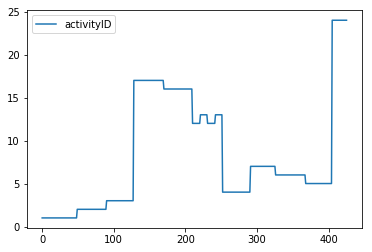

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
dp.df.plot(y='activityID');